# 1) Introduction

Structured Query Language (SQL, usually pronounced S-Q-L or "sequel") is a programming language designed for managing data within a Database Management System (DBMS) — a software that stores, manipulates, and retrieves data efficiently.

In this course, we'll act as a data analyst for a fictional superstore. Our job is to transform raw data into information that is clear and easy-to-understand for our supervisor. We'll query data from the superstore database.

In [4]:
%load_ext sql

# Conect to a Superstore Database

In [5]:
%sql sqlite:///superstore.db

In [9]:
%%sql
SELECT order_id, product_name, sales, quantity,
       CASE 
       WHEN sales BETWEEN 0 AND 50 THEN 'small sale'
       WHEN sales BETWEEN 51 AND 100 THEN 'medium sale'
       ELSE 'large sale'
       END AS sales_amount                        
  FROM orders
 WHERE order_id LIKE 'CA%'
 ORDER BY quantity
 LIMIT 3;

 * sqlite:///superstore.db
Done.


order_id,product_name,sales,quantity,sales_amount
CA-2015-115742,"Global Leather Task Chair, Black",89.99,1,medium sale
CA-2016-111682,Prang Dustless Chalk Sticks,1.68,1,small sale
CA-2016-106075,Avery Binding System Hidden Tab Executive Style Index Sets,4.616,1,small sale


# 2) Reading from a Table

The types of operations SQL can perform are often referred to as CRUD, or:

* Create;
* Read
* Update
* Delete

Data professionals most likely to perform **read** operations, and that will be the emphasis of this course.

The **superstore** database contains a table called `returns`, which contains information about which orders were returned. Our first line of code is to retrieve the first five rows of this table:

```SQL

SELECT * 
  FROM returns
 LIMIT 5;

 ```

 * `*` is a special character meaning "all." We'll learn more about the SELECT clause later, but for now we can read this line as "select all columns."
 
 * `FROM returns`tells SQL which table to read data from. We'll learn more about how databases and tables work and how to manage them.

 * `LIMIT 5` returns the number of rows returned to 5. Remember, a table might have millions of rows 

In [ ]:
%%sql
SELECT *
    from orders
    limit 3

 * sqlite:///superstore.db
Done.


order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0.0,219.582
CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0.0,6.8714


# 3) Different SQL Dialects

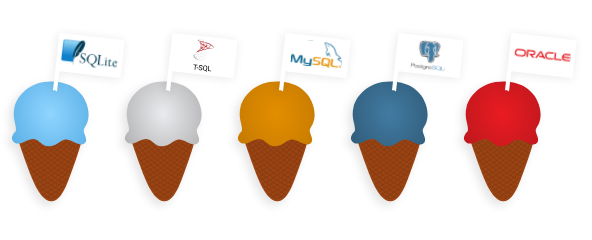

These different versions are more alike than they are different (just like the different dialects of English). Nearly everything we'll learn in this course — and subsequent SQL courses — applies to all SQL flavors, thanks to the ANSI SQL standard.

ANSI SQL is a standardized version of SQL that serves as a common ground for all SQL dialects. It ensures that the core functionality of SQL remains consistent across different SQL implementations, making it easier for developers to work with various database systems.

However, there are still differences in syntax, functions, and features among SQL dialects. One such difference is how we limit the displayed results.

For example, in T-SQL (Microsoft's SQL flavor), we would write the following query:

**SQLITE**:

```SQL

SELECT *
  FROM orders
 LIMIT 5;

```

**T-SQL**:

```SQL

SELECT TOP 5 *
  FROM orders;
```

When working with different SQL dialects, it's important to be aware of their specific syntax and features

## Instructions

A new analyst was hired for Superstore that knows T-SQL, but not SQLite, the SQL flavor for Superstore's database. They're trying to look at a sample of the returns table, but are frustrated that their query isn't working:

```SQL
SELECT TOP 4 *
  FROM returns;

```

In [10]:
%%sql
SELECT *
    from returns
    limit 4

 * sqlite:///superstore.db
Done.


returned,order_date,order_id,customer_id,customer_name
Yes,2017-09-19,CA-2017-153822,AB-10105,Adrian Barton
Yes,2017-04-25,CA-2017-129707,LH-16750,Larry Hughes
Yes,2014-12-29,CA-2014-152345,ST-20530,Shui Tom
Yes,2015-12-05,CA-2015-156440,MH-17620,Matt Hagelstein


# 4) Select ROWS and FIELDS

Most databases are like `superstore` in that they consist of multiple tables of data.

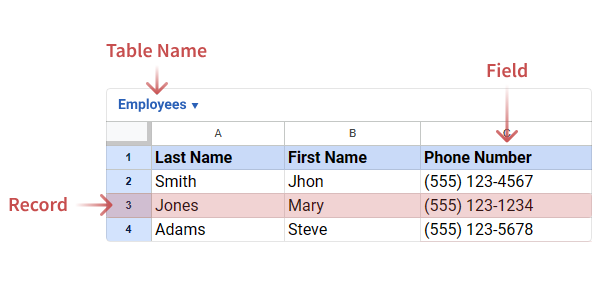

We've seen how to reduce the number of `records` shown by using the `LIMIT` clause:

```sql

SELECT *
    from returns
    limit 4

```

As we learned earlier, we can retrieve the data from all fields in a table with help of the `*` wildcard. If we want to select specific fields to be returned by the query, we can list them in the `SELECT` clause, separated by commas:

```sql
SELECT order_id, order_date, category, subcategory 
  FROM orders;

```

## Instructions

1. Write a query from the `orders` table that only selects relevant fields:

    order_date

    order_id


    product_name

    sales

    quantity

2.  Limit the number of records to `5`.

In [12]:
%%sql

SELECT order_date, order_id, product_name, sales, quantity
    FROM orders
    LIMIT 5

 * sqlite:///superstore.db
Done.


order_date,order_id,product_name,sales,quantity
2016-11-08,CA-2016-152156,Bush Somerset Collection Bookcase,261.96,2
2016-11-08,CA-2016-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3
2016-06-12,CA-2016-138688,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2
2015-10-11,US-2015-108966,Bretford CR4500 Series Slim Rectangular Table,957.5775,5
2015-10-11,US-2015-108966,Eldon Fold 'N Roll Cart System,22.368,2


# 5) Defining Relational Databases

superstore database has 3 tables:

1. `orders`
1. `returns`
1. `managers`


Each table in a database is connected to other tables through fields that relate to one another. This type of database is called a relational database, and we can visualize the relationship between tables with a schema diagram. Let's take a look at the diagram for our database:

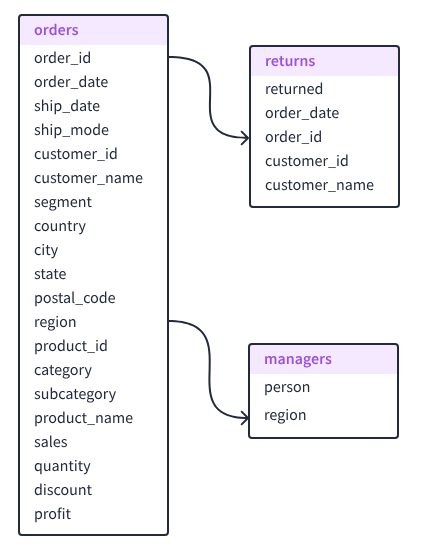

## Instructions

1. Write a query to ask the Superstore database to show the `city`, `state`, and `region` fields from the ``orders`` table.

1. Your supervisor only needs to see a sample of the data, so limit your results to `10` records.

In [13]:
%%sql
SELECT city, state, region
    from orders
    limit 10

 * sqlite:///superstore.db
Done.


city,state,region
Henderson,Kentucky,South
Henderson,Kentucky,South
Los Angeles,California,West
Fort Lauderdale,Florida,South
Fort Lauderdale,Florida,South
Los Angeles,California,West
Los Angeles,California,West
Los Angeles,California,West
Los Angeles,California,West
Los Angeles,California,West


# 6) Aliasing Results

Sometimes the notations used to name fields in a table are easy to type, but may look awkward to present.

For example, what if we'd like to rename the following table so the headers have more human-readable names like "Order ID", "Order Date" and "Ship Date?"

It's possible to do that right from the `SELECT` clause with help of the `AS` keyword. `AS` will let you temporarily rename or **alias** these fields

```sql

SELECT order_id AS 'Order ID',
       order_date AS 'Order Date',
       ship_date AS 'Ship Date'
  FROM orders;

```

When using aliases, quotes are optional for simple, single-word names without spaces or special characters. However, they are recommended—or sometimes required—when the alias:

* Contains spaces (e.g., `order_id AS 'Order ID'`)

* Contains special characters or reserved words (e.g., `usd AS 'Dollars ($)'`)

* Is case-sensitive (e.g., `order_date AS 'OrderDate'`)

Interestingly, the `AS` keyword is technically optional, and we can simply write the alias directly after the column or table name like this:

```sql

SELECT order_id 'Order ID',
       order_date 'Order Date',
       ship_date 'Ship Date'
  FROM orders;

```

Both approaches are valid and produce the same result, but using AS is preferred for a few reasons:

**Readability:** Including AS in the query explicitly indicates that an alias is being used, making it easier for others (or yourself) to understand the query when reading it later.

**Consistency:** Different databases may have varying support for aliasing without the AS keyword. To ensure queries are compatible across database systems, it's a good idea to use AS.

**Avoiding Errors:** Using AS can prevent potential errors caused by ambiguity, especially when column names are similar to keywords in SQL.

## Instructions

1. Write a query to return the `city`, `state` and `postal_code` fields from `orders`.

1. Alias the results as `City`, `State` and `ZIP Code`, respectively. Make sure to capitalize aliases as specified.

1. Limit results to `10` records.

In [14]:
%%sql
select city as 'City',
       state as 'State',
       postal_code as 'ZIP Code'
    from orders
    limit 10

 * sqlite:///superstore.db
Done.


City,State,ZIP Code
Henderson,Kentucky,42420
Henderson,Kentucky,42420
Los Angeles,California,90036
Fort Lauderdale,Florida,33311
Fort Lauderdale,Florida,33311
Los Angeles,California,90032
Los Angeles,California,90032
Los Angeles,California,90032
Los Angeles,California,90032
Los Angeles,California,90032


# 7) Comments

in SQL, Single-line comments in SQL are started with two dashes, like so:

```sql
-- This is a single line comment.
-- Each single line comment must start with two dashes.
SELECT *
  FROM orders
 LIMIT 5;
```

We can also write multi-line comments by using the `/*` and `*/` characters at the start and end of a comment. This is often useful when we want to "**comment out**" a whole query:

```sql

/* 
This is a multi-line comment.
The query below will not run because it is inside of this comment:

SELECT order_id, product_name
  FROM orders
 LIMIT 10;
*/

```